In [100]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

from pathlib import Path

pd.set_option('display.max_columns', 150)

%matplotlib inline

In [101]:
data = pd.read_csv('Chicago_Crimes_2017.csv')
print(data.shape)
data.head()

(11357, 22)


,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,Location Description,Arrest,Domestic,Beat,District,Ward,CommunityArea,FBICode,X Coordinate,Y Coordinate,Year,UpdatedOn,Latitude,Longitude,Location
0,10801165,JA100077,01/01/2017 01:00:00 AM,0000X W DIVISION ST,0460,BATTERY,SIMPLE,BAR OR TAVERN,True,False,1824,18.0,42.0,8.0,08B,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
1,10801166,JA100115,01/01/2017 01:23:00 AM,084XX S SANGAMON ST,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,SIDEWALK,True,False,613,6.0,21.0,71.0,24,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
2,10801090,JA100010,01/01/2017 12:01:00 AM,064XX S STONY ISLAND AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,314,3.0,5.0,42.0,14,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
3,10801101,JA100031,01/01/2017 12:00:00 AM,074XX S SOUTH CHICAGO AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,324,3.0,5.0,69.0,14,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN
4,10801104,JA100015,01/01/2017 12:00:00 AM,004XX W 66TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,722,7.0,20.0,68.0,08B,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN


## Ejercicio 1
Genera un gráfico de barras que contenga el nº de siniestros ocurrido en cada mes del año. El gráfico será tal que así:

In [102]:
#data date debes ser cibvertido a tipo fecha, dayfirst indica que el primer valor hace referencia a un dia
data['Date'] = pd.to_datetime(data['Date'],format='mixed', dayfirst=True)
data['month'] = data['Date'].dt.month
data.head()

,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,Location Description,Arrest,Domestic,Beat,District,Ward,CommunityArea,FBICode,X Coordinate,Y Coordinate,Year,UpdatedOn,Latitude,Longitude,Location,month
0,10801165,JA100077,2017-01-01 01:00:00,0000X W DIVISION ST,0460,BATTERY,SIMPLE,BAR OR TAVERN,True,False,1824,18.0,42.0,8.0,08B,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN,1
1,10801166,JA100115,2017-01-01 01:23:00,084XX S SANGAMON ST,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,SIDEWALK,True,False,613,6.0,21.0,71.0,24,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN,1
2,10801090,JA100010,2017-01-01 00:01:00,064XX S STONY ISLAND AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,314,3.0,5.0,42.0,14,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN,1
3,10801101,JA100031,2017-01-01 00:00:00,074XX S SOUTH CHICAGO AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,324,3.0,5.0,69.0,14,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN,1
4,10801104,JA100015,2017-01-01 00:00:00,004XX W 66TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,722,7.0,20.0,68.0,08B,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN,1


In [103]:
#calculamos los crimenes que hubo por mes
crimes_by_month = data.groupby('month').size()
crimes_by_month

month
1     4670
2      574
3      675
4      574
5      558
6      569
7      593
8      568
9      676
10     659
11     633
12     608
dtype: int64

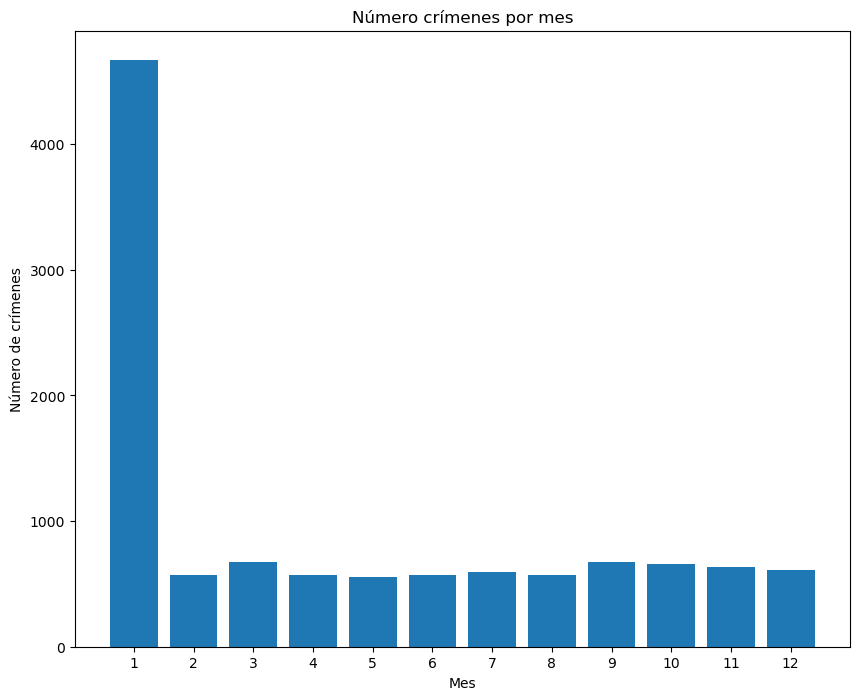

In [104]:
fig, ax = plt.subplots(figsize = (10,8))
#eje x va el indice (que es el mes), y en la altura va el valor(total) de los crimmenes
ax.bar(x = crimes_by_month.index, height = crimes_by_month.values)

#establecemos en el eje X que se muestre el valor de indice de crimes by month, que en este caso serian los meses de 1 a 
ax.set_xticks(crimes_by_month.index.values);
ax.set_title("Número crímenes por mes")
ax.set_ylabel("Número de crímenes")
ax.set_xlabel('Mes');

## Ejercicio 2
Añade al gráfico anterior, usando puntos, el nº de siniestros cuyo Primary Type = 'Battery'.

- Representa esos puntos usando el eje derecho.
- Muestra una leyenda con el significado de ambos
  


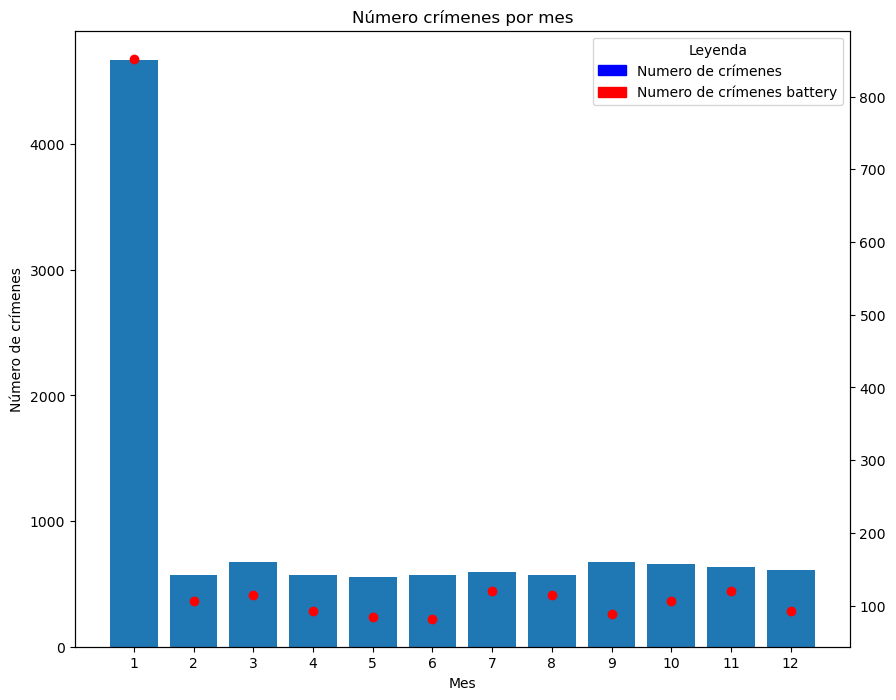

In [105]:
import matplotlib.patches as mpatches

#Filtramos para obtener los crimenes cuyo primary tipe sea battery
crimes_battery = data[data['PrimaryType'] == "BATTERY"].groupby('month').size()

fig, ax = plt.subplots(figsize = (10,8))
#eje x va el indice (que es el mes), y en la altura va el valor(total) de los crimmenes
ax.bar(x = crimes_by_month.index, height = crimes_by_month.values)
#establecemos en el eje X que se muestre el valor de indice de crimes by month, que en este caso serian los meses de 1 a 
ax.set_xticks(crimes_by_month.index.values);
ax.set_title("Número crímenes por mes")
ax.set_ylabel("Número de crímenes")
ax.set_xlabel('Mes');

ax1 = ax.twinx()
ax1.scatter(x = crimes_battery.index, y = crimes_battery.values, c = 'red', label = 'Battery Crimes' )

#rellenamos los datos que va a tener la leyenda
bar = mpatches.Patch(color = 'blue', label = 'Numero de crímenes')
battery = mpatches.Patch(color = 'red', label = 'Numero de crímenes battery')

#pintamos la leyenda
plt.legend(handles = [bar, battery], title='Leyenda')

## Ejercicio 3

Filtra solo los siniestros cuyo Primary Type son "THEFT", "BATTERY", "CRIMINAL DAMAGE" o "OTHER OFFENSE". Luego, genera 2 gráficos en el mismo fig.

- El primero, será un gráfico de tartas que muestre el % que representa cada tipo en el dataset.
- El segundo, será un gráfico de puntos, representando el nº de siniestros de cada tipo en cada mes.


In [106]:
#Primero generaremos un dataframe en el que filtraremos los  siniestros cuyo Primary Type son "THEFT", "BATTERY", "CRIMINAL DAMAGE" o "OTHER OFFENSE"
df = data.query('PrimaryType in ["THEFT", "BATTERY", "CRIMINAL DAMAGE", "OTHER OFFENSE"]')
df.shape


(6646, 23)

In [107]:
df.head()

,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,Location Description,Arrest,Domestic,Beat,District,Ward,CommunityArea,FBICode,X Coordinate,Y Coordinate,Year,UpdatedOn,Latitude,Longitude,Location,month
0,10801165,JA100077,2017-01-01 01:00:00,0000X W DIVISION ST,0460,BATTERY,SIMPLE,BAR OR TAVERN,True,False,1824,18.0,42.0,8.0,08B,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN,1
2,10801090,JA100010,2017-01-01 00:01:00,064XX S STONY ISLAND AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,314,3.0,5.0,42.0,14,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN,1
3,10801101,JA100031,2017-01-01 00:00:00,074XX S SOUTH CHICAGO AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,324,3.0,5.0,69.0,14,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN,1
4,10801104,JA100015,2017-01-01 00:00:00,004XX W 66TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,722,7.0,20.0,68.0,08B,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN,1
5,10801111,JA100033,2017-01-01 00:00:00,010XX W ADDISON ST,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,STREET,True,False,1923,19.0,44.0,6.0,26,NaN,NaN,2017,01/08/2017 03:48:20 PM,NaN,NaN,NaN,1


In [108]:
#usamos normalize apra que nos devuelva lss porcentajes de cada una de los crimenes en primarytype
value_counts = df['PrimaryType'].value_counts(normalize = True)
value_counts

PrimaryType
THEFT              0.375113
BATTERY            0.297021
CRIMINAL DAMAGE    0.196359
OTHER OFFENSE      0.131508
Name: proportion, dtype: float64

In [109]:
#Voy a obtener por cada mes el numero de siniestros de cada tipo
num = df.groupby(['PrimaryType','month']).size().unstack().T
num

PrimaryType,BATTERY,CRIMINAL DAMAGE,OTHER OFFENSE,THEFT
month,,,,
1,852,538,328,1055
2,106,72,42,112
3,114,81,44,132
4,93,54,47,156
5,84,67,50,122
6,82,68,40,118
7,120,59,42,114
8,115,68,56,103
9,89,88,48,152


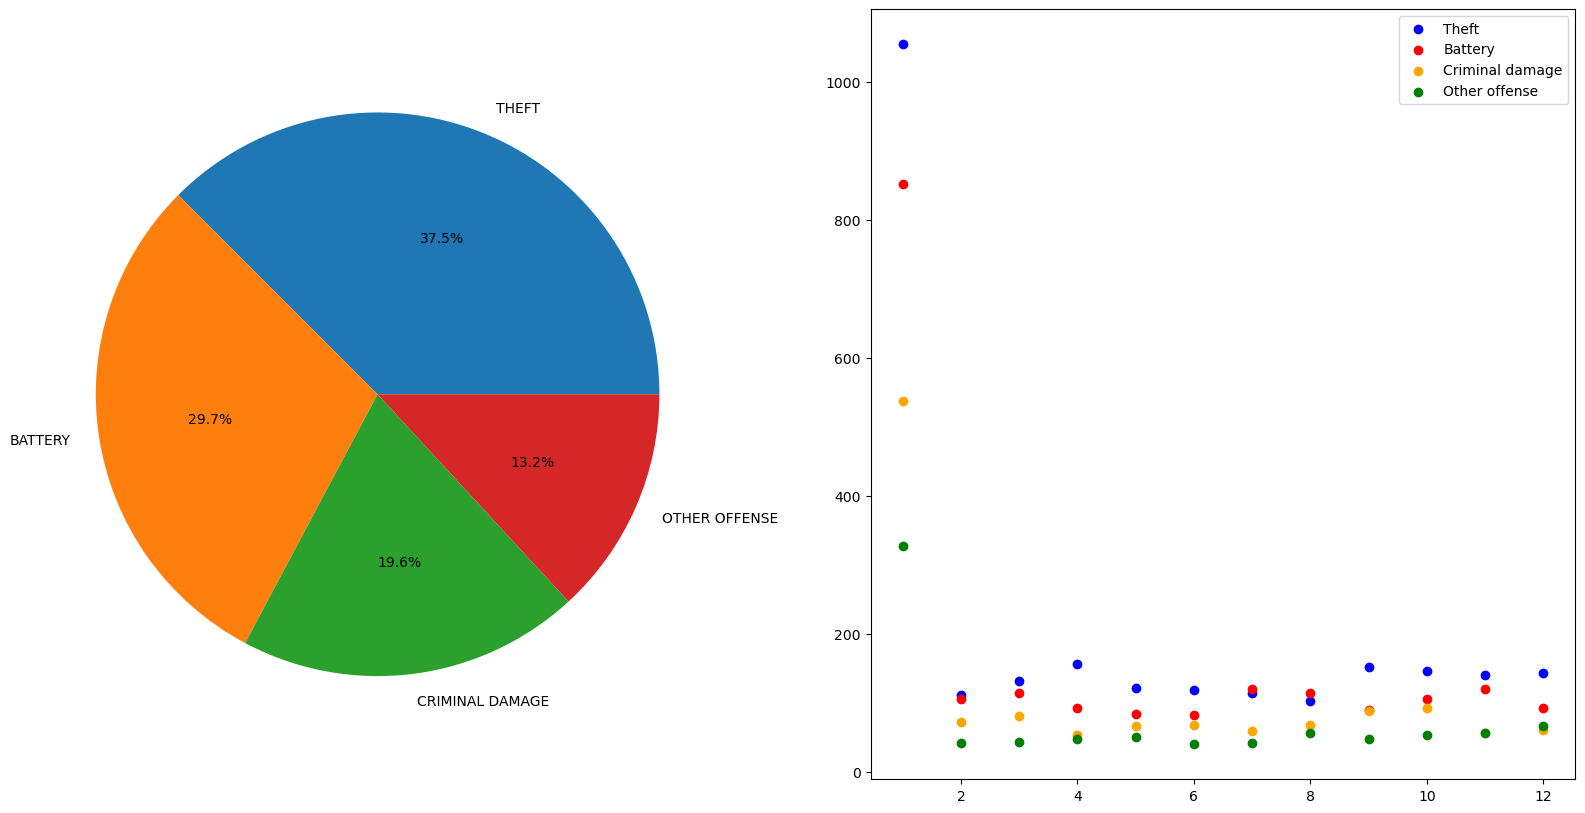

In [110]:
fig,ax = plt.subplots(ncols = 2, figsize = (20,10))
ax[0].pie(value_counts, labels = value_counts.index, autopct = '%1.1f%%');

ax[1].scatter(x = num.index, y = num['THEFT'], c = 'blue', label = 'Theft')
ax[1].scatter(x = num.index, y = num['BATTERY'], c = 'red', label = 'Battery')
ax[1].scatter(x = num.index, y = num['CRIMINAL DAMAGE'], c = 'orange', label = 'Criminal damage')
ax[1].scatter(x = num.index, y = num['OTHER OFFENSE'], c = 'green', label = 'Other offense')
ax[1].legend();
